# *IRIS*

**STUDY THE DATASET**

In [ ]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


NameError: ignored

In [ ]:
mean = df.mean()
mean

sepal length    5.843333
sepal width     3.054000
petal length    3.758667
petal width     1.198667
dtype: float64

In [ ]:
var = df.var() 
var 

sepal length    0.685694
sepal width     0.188004
petal length    3.113179
petal width     0.582414
dtype: float64

In [ ]:
cov = df.cov()
cov

,sepal length,sepal width,petal length,petal width
sepal length,0.685694,-0.039268,1.273682,0.516904
sepal width,-0.039268,0.188004,-0.321713,-0.117981
petal length,1.273682,-0.321713,3.113179,1.296387
petal width,0.516904,-0.117981,1.296387,0.582414


In [ ]:
corr = df.corr()
corr

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


**PCA**

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [ ]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


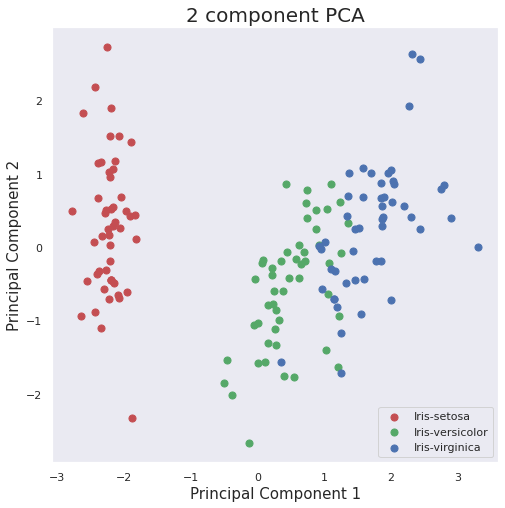

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [ ]:
import numpy as np

X_covariance_matrix = np.cov(x.T)
X_covariance_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [ ]:
Eigenvalues, Eigenvectors = np.linalg.eig(X_covariance_matrix)

print('Eigenvalues %s \n' %Eigenvalues)
print('Eigenvectors \n%s\n' %Eigenvectors)


Eigenvalues [2.93035378 0.92740362 0.14834223 0.02074601] 

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]



In [ ]:
total=sum(Eigenvalues)
total

4.026845637583896

In [ ]:

variance_exp=[(i / total)*100 for i in sorted(Eigenvalues, reverse=True)]
print ("Variances of each of the 4 variables \n",variance_exp)
Cumulative_variance_exp=np.cumsum(variance_exp)
print("==============================================================================")
print("Captures of total variation travel each component (%)\n",Cumulative_variance_exp)

Variances of each of the 4 variables 
 [72.77045209380132, 23.03052326768066, 3.6838319576273824, 0.5151926808906327]
Captures of total variation travel each component (%)
 [ 72.77045209  95.80097536  99.48480732 100.        ]


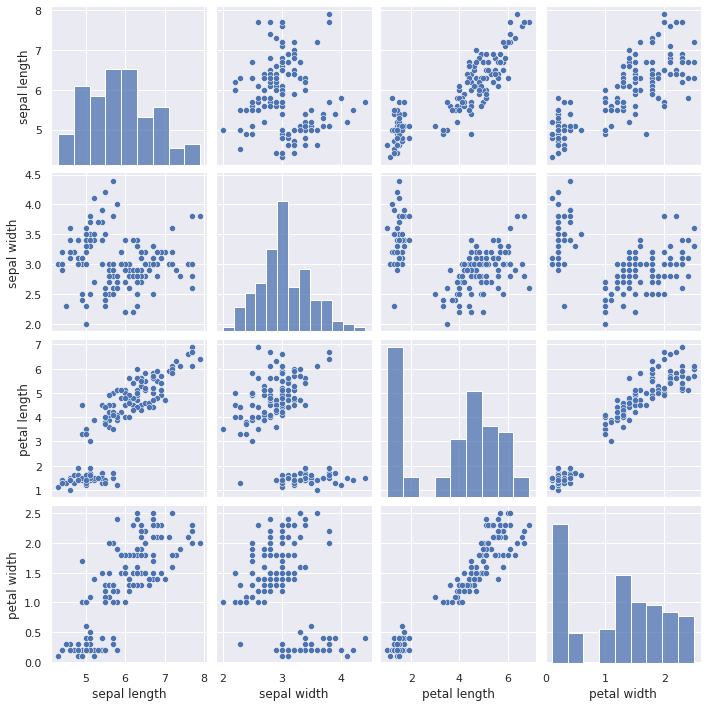

In [ ]:
import seaborn as sns
sns.set()
p=sns.pairplot(df)

# ***ABALONE***


**STUDY THE DATASET**

In [ ]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sex','length','diameter','height','whole weight','shucked weight','viscera weight','shell weight','rings'])
df

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
mean = df.mean()
mean

length            0.523992
diameter          0.407881
height            0.139516
whole weight      0.828742
shucked weight    0.359367
viscera weight    0.180594
shell weight      0.238831
rings             9.933684
dtype: float64

In [ ]:
var = df.var()
var

length             0.014422
diameter           0.009849
height             0.001750
whole weight       0.240481
shucked weight     0.049268
viscera weight     0.012015
shell weight       0.019377
rings             10.395266
dtype: float64

In [ ]:
cov = df.cov()
cov 

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
length,0.014422,0.011761,0.004157,0.054491,0.023935,0.011887,0.015007,0.215562
diameter,0.011761,0.009849,0.003461,0.045038,0.019674,0.009787,0.012507,0.183872
height,0.004157,0.003461,0.001750,0.016803,0.007195,0.003660,0.004759,0.075179
whole weight,0.054491,0.045038,0.016803,0.240481,0.105518,0.051946,0.065216,0.854409
shucked weight,0.023935,0.019674,0.007195,0.105518,0.049268,0.022675,0.027271,0.301204
viscera weight,0.011887,0.009787,0.003660,0.051946,0.022675,0.012015,0.013850,0.178057
shell weight,0.015007,0.012507,0.004759,0.065216,0.027271,0.013850,0.019377,0.281663
rings,0.215562,0.183872,0.075179,0.854409,0.301204,0.178057,0.281663,10.395266


In [ ]:
corr = df.corr()
corr

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['length','diameter','height','whole weight','shucked weight','viscera weight','shell weight','rings']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['sex']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-1.322914,1.795655
1,-3.483651,-0.092832
2,-0.536161,-0.049407
3,-1.458054,0.418640
4,-3.766906,-0.065752
...,...,...
4172,0.858730,0.187821
4173,0.701295,-0.231276
4174,2.033016,-0.693918
4175,1.601240,-0.465751


In [ ]:
finalDf = pd.concat([principalDf, df[['sex']]], axis = 1)
finalDf

,principal component 1,principal component 2,sex
0,-1.322914,1.795655,M
1,-3.483651,-0.092832,M
2,-0.536161,-0.049407,F
3,-1.458054,0.418640,M
4,-3.766906,-0.065752,I
...,...,...,...
4172,0.858730,0.187821,F
4173,0.701295,-0.231276,M
4174,2.033016,-0.693918,M
4175,1.601240,-0.465751,F


In [ ]:
import numpy as np

X_covariance_matrix = np.cov(x.T)
X_covariance_matrix

array([[1.00023946, 0.98704789, 0.82775178, 0.92548274, 0.89812868,
        0.90323394, 0.89792054, 0.55685289],
       [0.98704789, 1.00023946, 0.83388332, 0.92567371, 0.89337636,
        0.89993988, 0.90554657, 0.57479746],
       [0.82775178, 0.83388332, 1.00023946, 0.81941695, 0.77515787,
        0.79851047, 0.81753374, 0.55760082],
       [0.92548274, 0.92567371, 0.81941695, 1.00023946, 0.96963759,
        0.96660649, 0.95558422, 0.54051908],
       [0.89812868, 0.89337636, 0.77515787, 0.96963759, 1.00023946,
        0.93218449, 0.88282841, 0.42098444],
       [0.90323394, 0.89993988, 0.79851047, 0.96660649, 0.93218449,
        1.00023946, 0.90787367, 0.5039399 ],
       [0.89792054, 0.90554657, 0.81753374, 0.95558422, 0.88282841,
        0.90787367, 1.00023946, 0.62772433],
       [0.55685289, 0.57479746, 0.55760082, 0.54051908, 0.42098444,
        0.5039399 , 0.62772433, 1.00023946]])

In [ ]:
Eigenvalues, Eigenvectors = np.linalg.eig(X_covariance_matrix)

print('Eigenvalues %s \n' %Eigenvalues)
print('Eigenvectors \n%s\n' %Eigenvectors)

Eigenvalues [6.71404654e+00 6.95779541e-01 2.58505008e-01 1.66029591e-01
 1.26972036e-02 6.39985662e-03 6.34879663e-02 8.49700060e-02] 

Eigenvectors 
[[ 3.72138505e-01  6.82826958e-02  3.10703159e-02 -6.04053517e-01
   6.98825733e-01 -1.63485531e-02 -4.74968278e-02  1.11248478e-02]
 [ 3.73094111e-01  4.00480412e-02  4.10050673e-02 -5.87594701e-01
  -7.12985166e-01  2.19254893e-04 -2.33754046e-02 -5.79110156e-02]
 [ 3.40026777e-01 -7.04631477e-02  8.99705624e-01  2.56777039e-01
   8.61445194e-03 -2.68817140e-03  2.66914622e-02  5.67292650e-02]
 [ 3.78307478e-01  1.37346192e-01 -2.06193609e-01  2.41848954e-01
  -8.33128844e-03 -8.50264371e-01  1.17255046e-01 -1.56556128e-02]
 [ 3.62454487e-01  2.98839921e-01 -2.08286301e-01  1.83245659e-01
  -9.28176619e-03  3.91100542e-01  6.24892864e-01  3.98525300e-01]
 [ 3.68557801e-01  1.72978517e-01 -1.97379538e-01  2.65220563e-01
  -2.73455394e-02  2.04179031e-01 -7.65843810e-01  3.09821489e-01]
 [ 3.70757823e-01 -4.54004049e-02 -1.61574078e-01  

In [ ]:
total=sum(Eigenvalues)
total

8.00191570881226

In [ ]:

variance_exp=[(i / total)*100 for i in sorted(Eigenvalues, reverse=True)]
print ("Variances of each of the 8 variables \n",variance_exp)
Cumulative_variance_exp=np.cumsum(variance_exp)
print("==============================================================================")
print("Captures of total variation travel each component (%)\n",Cumulative_variance_exp)

Variances of each of the 8 variables 
 [83.9054893842501, 8.695162085806054, 3.2305390071805764, 2.074873036900413, 1.06187079588186, 0.7934095862599858, 0.1586770480987102, 0.07997905562230381]
Captures of total variation travel each component (%)
 [ 83.90548938  92.60065147  95.83119048  97.90606351  98.96793431
  99.7613439   99.92002094 100.        ]


<Figure size 720x360 with 0 Axes>

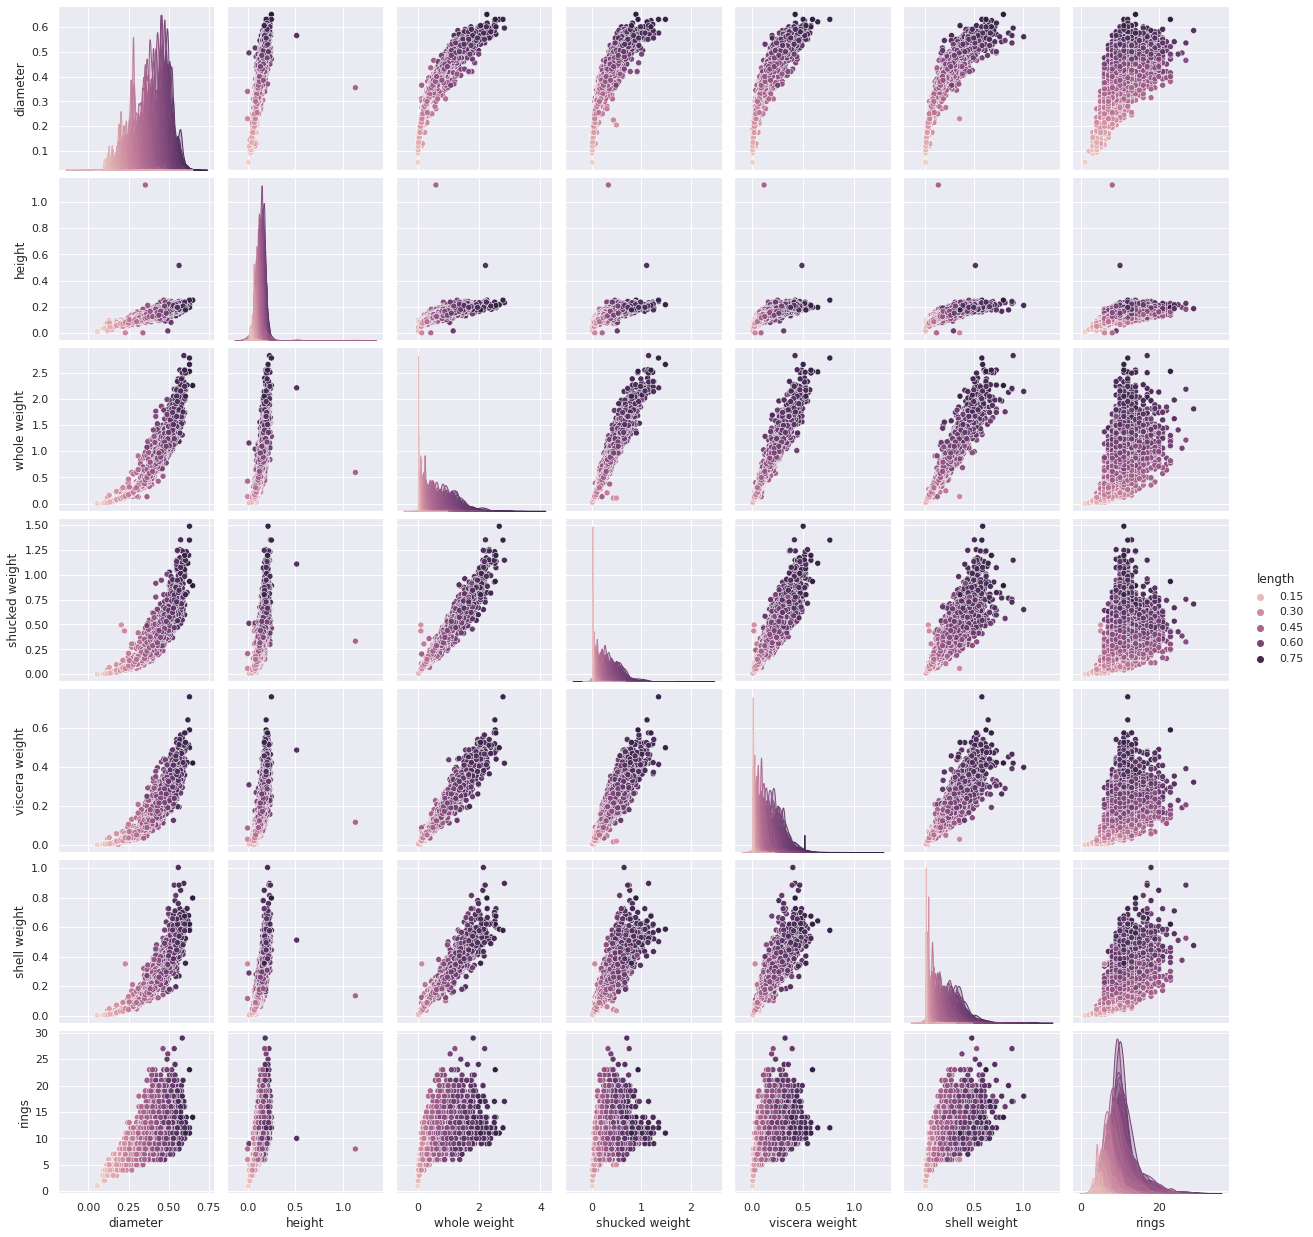

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.set()
p=sns.pairplot(df,hue='length')